In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error

In [29]:
data = pd.read_csv('cars_ridge.csv')

In [30]:
X = data.drop('price_k',axis=1)
y = data['price_k']

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
alphas = [0.01, 0.1, 1, 10, 100, 1000]
ridge = RidgeCV(alphas=alphas, cv=5)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

r2 = r2_score(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)

print(f'Best alpha: {ridge.alpha_}')
print(f'Coefficient: {ridge.coef_}')
print(f'Intercept: {ridge.intercept_}')
print(f'R-squared: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')


Best alpha: 100.0
Coefficient: [-9.04953116e-05  3.76067035e-01  7.30462692e-02  3.12011040e-02
  8.17280314e-01  7.59471623e-01  1.20071043e-02 -2.42281695e-01
  4.81721206e-01  8.59605376e-01]
Intercept: 8.79405523685758
R-squared: 0.51
Root Mean Squared Error: 7.68


In [32]:
ols = LinearRegression()
ols.fit(X_train, y_train)
y_pred_ols = ols.predict(X_test)

print("OLS R²:", r2_score(y_test, y_pred_ols))
print("OLS RMSE:", root_mean_squared_error(y_test, y_pred_ols))

OLS R²: 0.513214904003262
OLS RMSE: 7.63428793369425


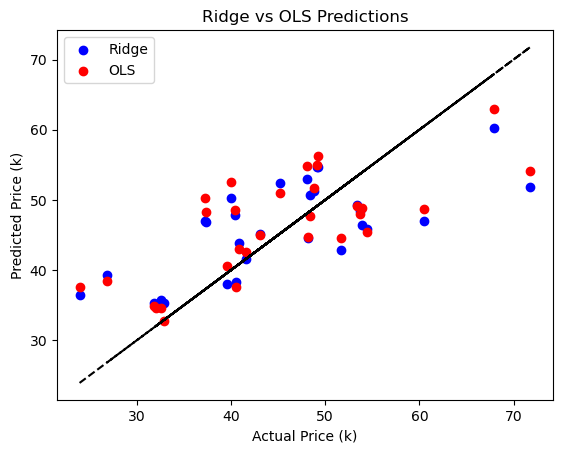

In [33]:
plt.scatter(y_test, y_pred, color='blue', label='Ridge')
plt.scatter(y_test, y_pred_ols, color='red', label='OLS')
plt.plot(y_test, y_test, 'k--')
plt.xlabel('Actual Price (k)')
plt.ylabel('Predicted Price (k)')
plt.title('Ridge vs OLS Predictions')
plt.legend()
plt.show()
